# <font color="#CE4A06">Cross-Validation</font>

Cross Validation is model evaluation techniques for assessing model's generalization to an unseen data set (test set).
- Unseen data set: reserved dataset on which you do not train the model.

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called ***overfitting***.

&nbsp;   
#### <font color="#1f7d02">*Overfitting & Underfitting*</font>

- Overfitting refers: the model performs extremely well to the training set but poorly on the test set.
    - Capturing noise in training set
    - Capturing patterns which do not generalize well to test set.

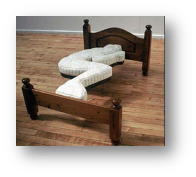

- Underfitting refers: the model do not capturing enough patterns in the data. The model performs poorly both in the training and the test set.

![OvrUnder](https://www.educative.io/api/edpresso/shot/6668977167138816/image/5033807687188480)

To avoid overfitting, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

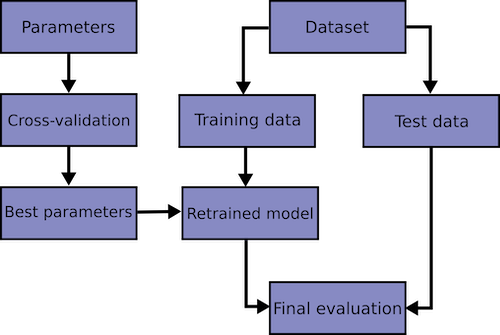

Reference: https://scikit-learn.org/stable/modules/cross_validation.html

\
With more detail from the above diagram:

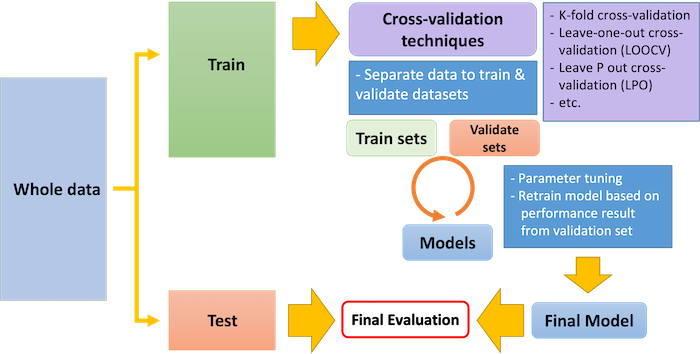

\
In this lesson, we will use the 'heart_failure_clinical_records_dataset'. Since the outcome variable is death event (Y/N), we will create and evaluate **classification** model.

&nbsp;   
**Attribute information:**  
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (0/1)
- high blood pressure: if the patient has hypertension (0/1)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (0/1)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (0=Female/1=Male)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (0/1)
- time: follow-up period (days)
- survive<sup>*</sup>: if the patient deceased during the follow-up period (0/1)

<sup>*</sup>Outcome variable/Label

&nbsp;   
<font color="#275bb0">**Read dataset**</font>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,survive
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,0
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,0
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,0
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,0
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,0
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,0


\
Class 1: survive  
Class 0: not survive

In [107]:
df.survive.value_counts()

survive
1    203
0     96
Name: count, dtype: int64

&nbsp;   
<font color="#275bb0">**Separate data and label**</font>

X: Data (features)  
y: Label (outcome)

In [108]:
X = df.loc[:,'age':'time']
print(X.shape)
X.head()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [109]:
y = df.survive
print(y.shape)
y

(299,)


0      0
1      0
2      0
3      0
4      0
      ..
294    1
295    1
296    1
297    1
298    1
Name: survive, Length: 299, dtype: int64

&nbsp;   
<font color="#275bb0">**Train-test split**</font>

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [111]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,1,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,1,118
...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,0,215
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,175
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40


\
Reset all indices to start from 0 to avoid further confusion.

In [112]:
X_train = X_train.reset_index(drop=True) #drop=True, Do not insert index into dataframe columns.
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [113]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
1,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
2,65.0,0,582,1,30,0,249000.0,1.3,136,1,1,212
3,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174
4,50.0,0,115,0,45,1,184000.0,0.9,134,1,1,118
...,...,...,...,...,...,...,...,...,...,...,...,...
204,55.0,0,572,1,35,0,231000.0,0.8,143,0,0,215
205,50.0,1,121,1,40,0,260000.0,0.7,130,1,0,175
206,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94
207,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40


\
Training set:

In [114]:
X_train.shape

(209, 12)

In [115]:
y_train.value_counts()

survive
1    141
0     68
Name: count, dtype: int64

\
Test set:

In [116]:
X_test.shape

(90, 12)

In [117]:
y_test.value_counts()

survive
1    62
0    28
Name: count, dtype: int64

&nbsp;   
<font color="#275bb0">**Feature data scaling**</font>

\
We can use std() to infer data scale in each column:

In [118]:
df.std(numeric_only=True)

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
survive                         0.467670
dtype: float64

\
Performing feature data scaling:

In [119]:
from sklearn.preprocessing import MinMaxScaler
# If have category should use MinMaxScaler instead of StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

\
Scale training set:

In [120]:
X_train_sc = scaler.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [121]:
X_train_sc.std(numeric_only=True)

age                         0.215009
anaemia                     0.497602
creatinine_phosphokinase    0.127765
diabetes                    0.497001
ejection_fraction           0.233453
high_blood_pressure         0.480815
platelets                   0.123246
serum_creatinine            0.109068
serum_sodium                0.145281
sex                         0.479378
smoking                     0.464016
time                        0.280701
dtype: float64

In [122]:
X_train_sc

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.555556,0.0,0.071319,0.0,0.541667,0.0,0.031398,0.247191,0.71875,1.0,1.0,0.891304
1,0.370370,1.0,0.072085,1.0,0.958333,0.0,0.204752,0.067416,0.90625,0.0,0.0,0.105072
2,0.462963,0.0,0.071319,1.0,0.333333,0.0,0.271427,0.089888,0.71875,1.0,1.0,0.753623
3,0.000000,0.0,0.028196,0.0,0.645833,1.0,0.302946,0.044944,0.84375,0.0,0.0,0.615942
4,0.185185,0.0,0.011738,0.0,0.645833,1.0,0.192629,0.044944,0.65625,1.0,1.0,0.413043
...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.277778,0.0,0.070043,1.0,0.437500,0.0,0.249606,0.033708,0.93750,0.0,0.0,0.764493
205,0.185185,1.0,0.012503,1.0,0.541667,0.0,0.284762,0.022472,0.53125,1.0,0.0,0.619565
206,0.833333,1.0,0.010079,0.0,0.958333,0.0,0.584192,0.303371,0.78125,0.0,0.0,0.326087
207,0.370370,0.0,0.071319,1.0,0.500000,1.0,0.516305,0.011236,0.78125,1.0,1.0,0.130435


\
Scale test set:

In [123]:
X_test_sc = scaler.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [124]:
X_test_sc.std(numeric_only=True)

age                         0.232880
anaemia                     0.494792
creatinine_phosphokinase    0.114649
diabetes                    0.487548
ejection_fraction           0.273957
high_blood_pressure         0.474045
platelets                   0.107486
serum_creatinine            0.132003
serum_sodium                0.118637
sex                         0.477849
smoking                     0.477849
time                        0.282332
dtype: float64

&nbsp;   
#### <font color="#166e20">*Using Cross-Validation Techniques*</font>

&nbsp;   
<font color="#275bb0">**K-fold cross-validation**</font>

This K is meaning dataset not same meaning in K in KNN (Neighbor)

Provides train/validate indices to split data in train/validate sets.
Split dataset into k consecutive folds (without shuffling by default).

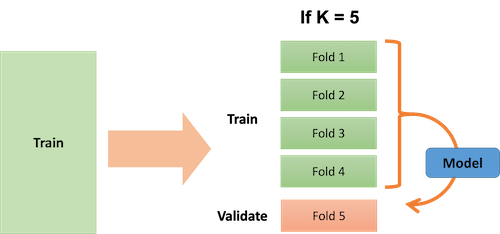

\
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

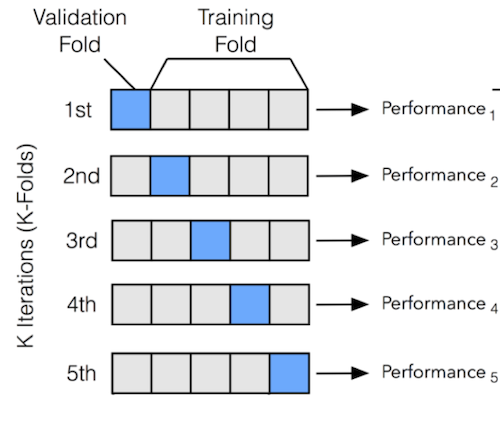

&nbsp;   
<font color="#275bb0">**Separate data into K folds (in this case K = 5)**</font>

***If not shuffle (default)***

In [125]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,
           shuffle=False, # by defalut shuffle=False
           random_state=None) # Setting a random_state has no effect since shuffle is False

\
Try split data on y_train:

In [126]:
folds = kf.split(y_train)

\
We can see that there are class **imbalance** in some folds.

In [127]:
n_fold = 1
for train_index, val_index in folds:
    print("====\nIteration: ",n_fold)
    n_fold += 1
    print("train sample fract. (class 1/0): ", y_train[train_index].value_counts()[1]/y_train[train_index].value_counts()[0])
    print("validate sample fract. (class 1/0): ", y_train[val_index].value_counts()[1]/y_train[val_index].value_counts()[0])


====
Iteration:  1
train sample fract. (class 1/0):  2.0925925925925926
validate sample fract. (class 1/0):  2.0
====
Iteration:  2
train sample fract. (class 1/0):  2.0925925925925926
validate sample fract. (class 1/0):  2.0
====
Iteration:  3
train sample fract. (class 1/0):  1.8305084745762712
validate sample fract. (class 1/0):  3.6666666666666665
====
Iteration:  4
train sample fract. (class 1/0):  2.34
validate sample fract. (class 1/0):  1.3333333333333333
====
Iteration:  5
train sample fract. (class 1/0):  2.0545454545454547
validate sample fract. (class 1/0):  2.1538461538461537


&nbsp;   
***Enable shuffle***

In [128]:
kf = KFold(n_splits=5,
           shuffle=True, # Enable shuffle
           random_state=1234) # With shuffle=True, random_state can now be set

In [129]:
folds = kf.split(y_train)

In [130]:
n_fold = 1
for train_index, val_index in folds:
    print("====\nIteration: ",n_fold)
    n_fold += 1
    print("train sample fract (class 1/0): ", y_train[train_index].value_counts()[1]/y_train[train_index].value_counts()[0])
    print("validate sample fract (class 1/0): ", y_train[val_index].value_counts()[1]/y_train[val_index].value_counts()[0])

====
Iteration:  1
train sample fract (class 1/0):  2.2115384615384617
validate sample fract (class 1/0):  1.625
====
Iteration:  2
train sample fract (class 1/0):  2.0925925925925926
validate sample fract (class 1/0):  2.0
====
Iteration:  3
train sample fract (class 1/0):  2.0925925925925926
validate sample fract (class 1/0):  2.0
====
Iteration:  4
train sample fract (class 1/0):  1.9298245614035088
validate sample fract (class 1/0):  2.8181818181818183
====
Iteration:  5
train sample fract (class 1/0):  2.0545454545454547
validate sample fract (class 1/0):  2.1538461538461537


Now, we get folds with better class balance.  
However, we can use stratified K-fold to help with this 'class balance' issue.

&nbsp;   
***Stratified K-fold***

Folds are made by preserving the percentage of samples for each class.

![skf](https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/skfold-768x530_ppp.png)

In [131]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=1234) # With shuffle=True, random_state can now be set

In [132]:
# X is feature and y is label
folds = skf.split(X=X_train_sc, y=y_train)

In [133]:
n_fold = 1
for train_index, val_index in folds:
    print("====\nIteration: ",n_fold)
    n_fold += 1
    print("train sample ratio (class 1/0): ", y_train[train_index].value_counts()[1]/y_train[train_index].value_counts()[0])
    print("validate sample ratio (class 1/0): ", y_train[val_index].value_counts()[1]/y_train[val_index].value_counts()[0])

====
Iteration:  1
train sample ratio (class 1/0):  2.036363636363636
validate sample ratio (class 1/0):  2.230769230769231
====
Iteration:  2
train sample ratio (class 1/0):  2.0925925925925926
validate sample ratio (class 1/0):  2.0
====
Iteration:  3
train sample ratio (class 1/0):  2.0925925925925926
validate sample ratio (class 1/0):  2.0
====
Iteration:  4
train sample ratio (class 1/0):  2.0925925925925926
validate sample ratio (class 1/0):  2.0
====
Iteration:  5
train sample ratio (class 1/0):  2.0545454545454547
validate sample ratio (class 1/0):  2.1538461538461537


&nbsp;   
<font color="#275bb0">**Create KNN & SVM models for training & validation**</font>

\
*KNN model:*

In [134]:
from sklearn.neighbors import KNeighborsClassifier as knn
model_knn = knn(n_neighbors=15) #heuristic K value = np.sqrt(len(y_train))

\
*SVM model:*

In [135]:
from sklearn import svm
model_svm = svm.SVC(kernel='rbf', C=1)

&nbsp;   
<font color="#275bb0">**Evaluate KNN model using 5-fold cross-validation**</font>

\
***Get scores from each fold***

In [136]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
scores = cross_validate(estimator=model_knn, # model object for fitting data
                        X=X_train_sc, # feature data
                        y=y_train, # label data
                        cv=skf, # cross-validation generator. If not specify, it will be stratified 5-fold (default).
                        scoring=['roc_auc', 'accuracy']) # score(s) to be evaluated
scores

{'fit_time': array([0.00309587, 0.00192571, 0.00321412, 0.00228453, 0.00192261]),
 'score_time': array([0.00815654, 0.01301479, 0.00761795, 0.00774407, 0.00703454]),
 'test_roc_auc': array([0.79442971, 0.72704082, 0.72066327, 0.79336735, 0.74450549]),
 'test_accuracy': array([0.73809524, 0.69047619, 0.71428571, 0.71428571, 0.73170732])}

\
Here, the performance scores are shown for each fold.  
So, there are 5 scores resulting from 5 iterations of 5-fold cross-validation.
  
It is OK to report an average score from 5 iterations only if we have a large dataset.  
However, when using a small dataset, there is *tendency that standard deviation* between scores from different folds will be high.

\
Accuracy score:  

In [137]:
print(f"accuracy = {scores['test_accuracy'].mean():.2f}\u00B1{scores['test_accuracy'].std():.2f}")

accuracy = 0.72±0.02


\
Area under the receiver operating characteristic curve (ROC AUC) score:

In [138]:
print(f"auc = {scores['test_roc_auc'].mean():.2f}\u00B1{scores['test_roc_auc'].std():.2f}")

auc = 0.76±0.03


\
We can compute for overall scores by define our own scoring function.  
Below is the example of using the custom 'onfusion_matrix_scorer' scoring function which acts like metrics.confusion_matrix().

In [139]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}

In [140]:
scores = cross_validate(estimator=model_knn, # model object for fitting data
                        X=X_train_sc, # feature data
                        y=y_train, # label data
                        cv=skf, # cross-validation generator. If not specify, it will be stratified 5-fold (default).
                        scoring=confusion_matrix_scorer) # score(s) to be evaluated
scores

{'fit_time': array([0.002666  , 0.00216627, 0.0016799 , 0.00188613, 0.00193858]),
 'score_time': array([0.00420403, 0.0052104 , 0.00408626, 0.0049417 , 0.00427938]),
 'test_tn': array([3, 3, 3, 2, 2]),
 'test_fp': array([10, 11, 11, 12, 11]),
 'test_fn': array([1, 2, 1, 0, 0]),
 'test_tp': array([28, 26, 27, 28, 28])}

In [141]:
overall_conf_mat = {'tp': scores['test_tp'].sum(),
                    'fn': scores['test_fn'].sum(),
                    'fp': scores['test_fp'].sum(),
                    'tn': scores['test_tn'].sum()}
overall_conf_mat

{'tp': np.int64(137),
 'fn': np.int64(4),
 'fp': np.int64(55),
 'tn': np.int64(13)}

By using this approach, we may need to write more lines of code to manipulate and calculate scores.  
Another way to compute overall scores is to use the function cross_val_predict() provided in the sklearn model_selection module.

&nbsp;   
***Get overall scores***

To get the overall score from the cross-validation process, the first step is to accumulate prediction results from **ALL FOLDS**.  
We can use loop to do prediction for each fold and then collect the results.  
Alternatively, we can use cross_val_predict() to do this job.

In [142]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(estimator=model_knn,
                           X=X_train_sc,
                           y=y_train,
                           cv=skf)
conf_mat = metrics.confusion_matrix(y_train, y_pred, labels=[1,0])

In [143]:
conf_mat

array([[137,   4],
       [ 55,  13]])

In [144]:
tp, fn, fp, tn = conf_mat.ravel()
print("true positives(tp):", tp) # here, positive = survive(1)
print("false negatives(fn):", fn)
print("false positives(fp):", fp)
print("true negatives(tn):", tn)

true positives(tp): 137
false negatives(fn): 4
false positives(fp): 55
true negatives(tn): 13


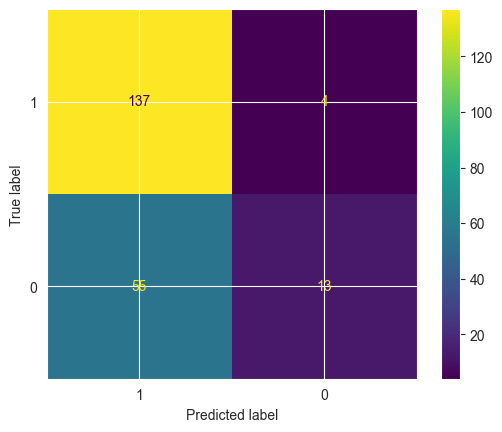

In [145]:
metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=[1,0]).plot()

\
What confusion matrix tell us:

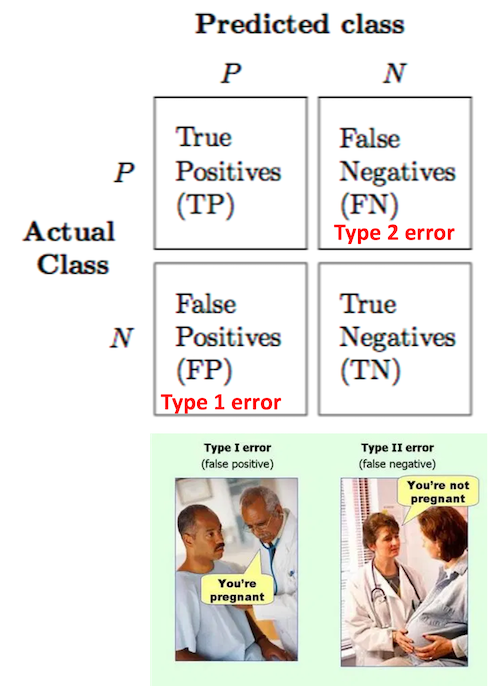

For classification model scoring metrics, see   
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics  &  
https://en.wikipedia.org/wiki/Confusion_matrix

\
To calculate overall precision, recall, and f1-score:

In [146]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.19      0.31        68
           1       0.71      0.97      0.82       141

    accuracy                           0.72       209
   macro avg       0.74      0.58      0.56       209
weighted avg       0.73      0.72      0.65       209



\
To get a single score:

In [147]:
metrics.accuracy_score(y_train, y_pred)

0.7177033492822966

In [148]:
metrics.recall_score(y_train, y_pred, average=None)

array([0.19117647, 0.97163121])

In [149]:
metrics.recall_score(y_train, y_pred, average='weighted')

np.float64(0.7177033492822966)

\
*Options for 'average' argument:*

None: the scores for each class are returned.  
'micro': Calculate metrics globally by considering each element of the label indicator matrix as a label.  
'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.  
'weighted': Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).  

\
To calculate area under the receiver operating characteristic curve (ROC AUC) score (value 0-1):

In [150]:
metrics.roc_auc_score(y_train, y_pred)

np.float64(0.581403838130997)

See that it is not that high compared to individual fold auc.

\
The curve of ROC AUC is derived from the plot between 'false positive rate' and 'true positive rate' as shown below.

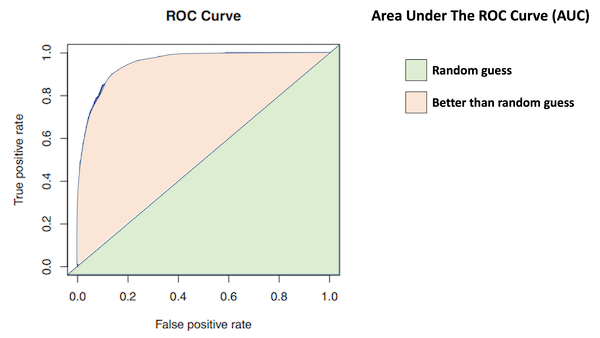

\
We can also plot ROC AUC curve:

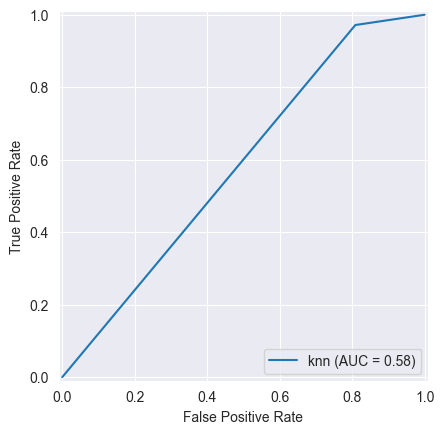

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='knn')
display.plot()

&nbsp;   
<font color="#275bb0">**Leave-one-out cross-validation (LOOCV)**</font>

Each sample is used once as a test set (singleton) while the remaining samples form the training set.

เหมาะกับงานที่มีชุดข้อมูลตัวอย่างน้อยๆ แม่นยำจริงแต่แลกมากับการที่ช้าเวลาข้อมูลเยอะ
ถ้าข้อมูลมีีซัก 1M ใช้เวลานานมาก

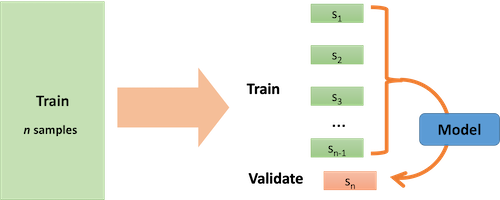

In [152]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [153]:
y_pred = cross_val_predict(estimator=model_knn,
                           X=X_train_sc,
                           y=y_train,
                           cv=loo)
conf_mat = metrics.confusion_matrix(y_train, y_pred, labels=[1,0])

In [154]:
conf_mat

array([[135,   6],
       [ 56,  12]])

In [155]:
tp, fn, fp, tn = conf_mat.ravel()
print("true positives(tp):", tp)
print("false negatives(fn):", fn)
print("false positives(fp):", fp)
print("true negatives(tn):", tn)

true positives(tp): 135
false negatives(fn): 6
false positives(fp): 56
true negatives(tn): 12


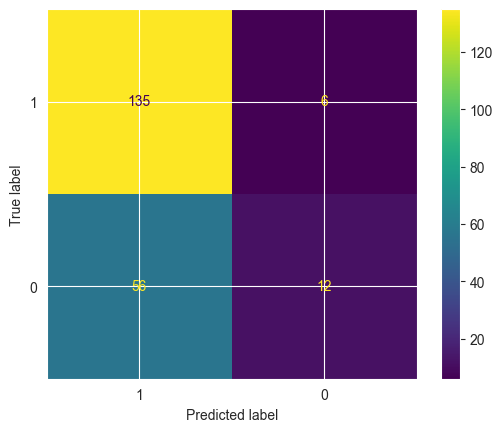

In [156]:
metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=[1,0]).plot()

In [157]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.18      0.28        68
           1       0.71      0.96      0.81       141

    accuracy                           0.70       209
   macro avg       0.69      0.57      0.55       209
weighted avg       0.69      0.70      0.64       209



\
AUC:

In [158]:
metrics.roc_auc_score(y_train, y_pred)

np.float64(0.5669586983729662)

\
Plot ROC AUC:

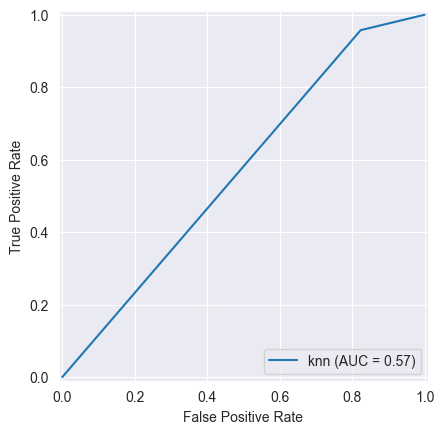

In [159]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='knn')
display.plot()

\
***Using SVM model***

In [160]:
y_pred = cross_val_predict(estimator=model_svm, # now svm
                           X=X_train_sc,
                           y=y_train,
                           cv=skf)
conf_mat = metrics.confusion_matrix(y_train, y_pred, labels=[1,0])

In [161]:
conf_mat

array([[130,  11],
       [ 29,  39]])

In [162]:
tp, fn, fp, tn = conf_mat.ravel()
print("true positives(tp):", tp)
print("false negatives(fn):", fn)
print("false positives(fp):", fp)
print("true negatives(tn):", tn)

true positives(tp): 130
false negatives(fn): 11
false positives(fp): 29
true negatives(tn): 39


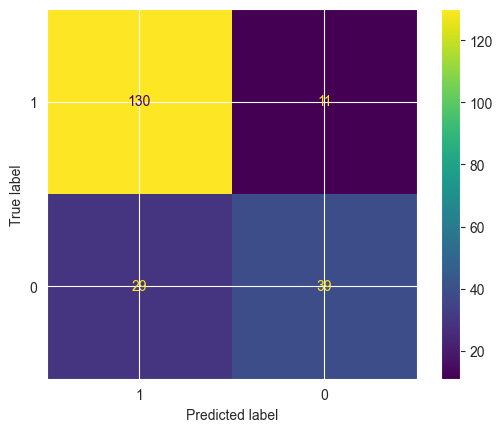

In [163]:
metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=[1,0]).plot()

In [164]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66        68
           1       0.82      0.92      0.87       141

    accuracy                           0.81       209
   macro avg       0.80      0.75      0.76       209
weighted avg       0.81      0.81      0.80       209



\
AUC:

In [165]:
metrics.roc_auc_score(y_train, y_pred)

np.float64(0.7477576136837714)

\
Plot ROC AUC:

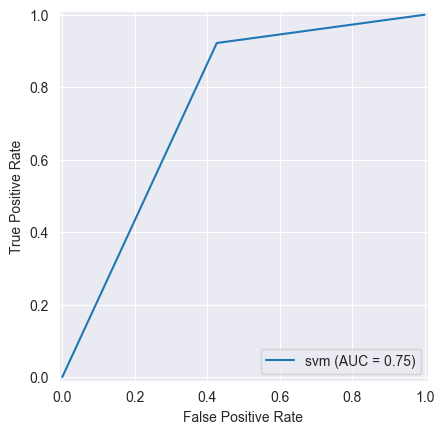

In [166]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='svm')
display.plot()

\
For other cv techniques, see https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

&nbsp;   
#### <font color="#166e20">*Parameter Tuning Using Cross-Validation Techniques*</font>

&nbsp;   
<font color="#275bb0">**Tune 'n_neighbors' in KNN model using 5-fold cv**</font>

\
Set range of 'n_neighbors' to be tested:

In [167]:
ks = range(1,31)

\
Configure cv:

In [168]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=1234)

\
Perform cv for each 'n_neighbors':

In [169]:
perf = {}
perf['n_neighbors'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for k in ks:
    model_knn = knn(n_neighbors=k)
    y_pred = cross_val_predict(estimator=model_knn,
                               X=X_train_sc,
                               y=y_train,
                               cv=skf) # Use stratified KFOLD
    acc = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred, average='weighted')
    f1 = metrics.f1_score(y_train, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_train, y_pred)

    perf['n_neighbors'].append(k)
    perf['acc'].append(acc)
    perf['precision'].append(precision)
    perf['recall'].append(recall)
    perf['f1'].append(f1)
    perf['auc'].append(auc)

perf = pd.DataFrame(perf)
perf.sort_values(by='auc', ascending=False).head()

,n_neighbors,acc,precision,recall,f1,auc
5,6,0.732057,0.718758,0.732057,0.717831,0.656758
11,12,0.755981,0.759767,0.755981,0.724533,0.651648
1,2,0.655502,0.688359,0.655502,0.664912,0.649510
9,10,0.741627,0.732899,0.741627,0.715043,0.644816
7,8,0.727273,0.712560,0.727273,0.703030,0.634178


\
Plot performance scores for each 'n_neighbors':

In [170]:
df_forPlot = pd.melt(perf,
                     value_vars = ['acc', 'precision', 'recall', 'f1', 'auc'],
                     id_vars = ['n_neighbors'],
                     var_name = 'Metric',
                     value_name = 'Score')

In [171]:
df_forPlot

,n_neighbors,Metric,Score
0,1,acc,0.688995
1,2,acc,0.655502
2,3,acc,0.693780
3,4,acc,0.665072
4,5,acc,0.688995
...,...,...,...
145,26,auc,0.547924
146,27,auc,0.507353
147,28,auc,0.529412
148,29,auc,0.507353


Text(0.5, 1.0, '5-fold cv performance scores at different n_neighbors')

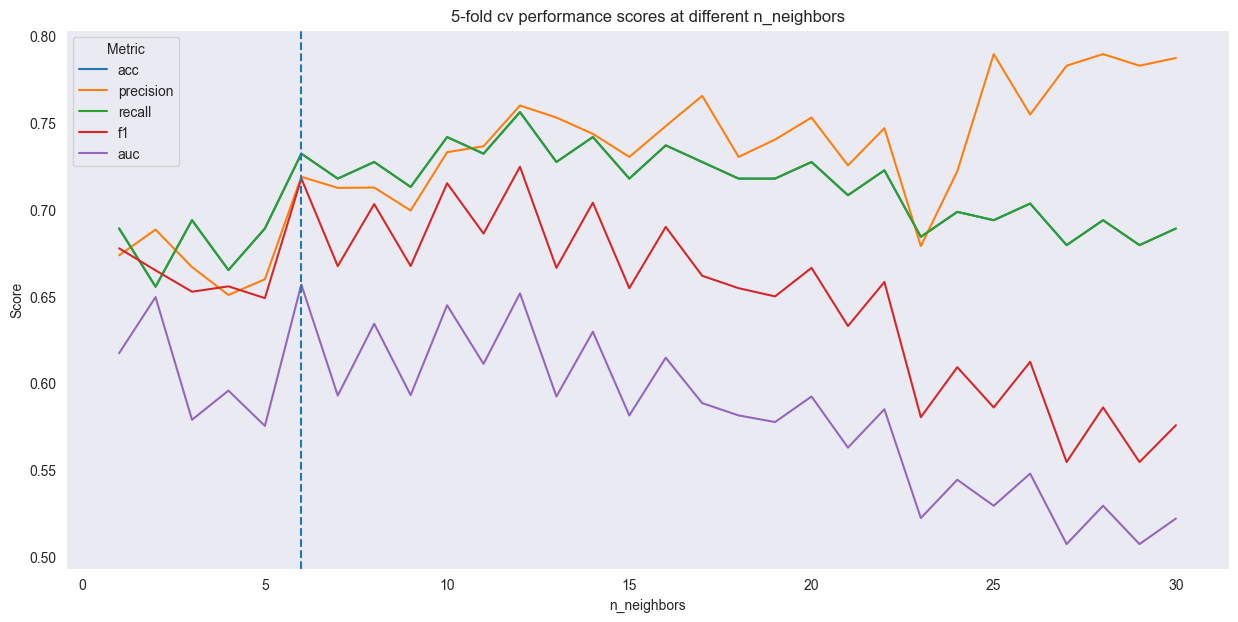

In [172]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data = df_forPlot,
             x = 'n_neighbors',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=6, ls="--")
plt.title('5-fold cv performance scores at different n_neighbors')

\
If we focus on auc, then we select n_neighbors=6

&nbsp;   
<font color="#275bb0">**Use KNN model with tuned 'n_neighbors' to predict test set**</font>

\
Create KNN model using n_neighbors=4 and fit on train data

In [173]:
model_knn = knn(n_neighbors=6)
model_knn.fit(X=X_train_sc, y=y_train)

KNeighborsClassifier(n_neighbors=6)

\
Use above knn model (optimized n_neighbors) to predict test set

In [174]:
y_pred_test = model_knn.predict(X_test_sc)

\
Evaluate model performance scores based on test set

In [175]:
acc = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test, average='weighted')
recall = metrics.recall_score(y_test, y_pred_test, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_test, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred_test)

print(f"Test set performance scores:\n"
      f"accuracy: {acc:.2f}\n"
      f"precision: {precision:.2f}\n"
      f"recall: {recall:.2f}\n"
      f"f1: {f1:.2f}\n"
      f"auc: {auc:.2f}\n"
     )

Test set performance scores:
accuracy: 0.67
precision: 0.63
recall: 0.67
f1: 0.64
auc: 0.55



&nbsp;   
<font color="#275bb0">**Tune 'n_neighbors' in KNN model using LOOCV**</font>

\
Set range of 'n_neighbors' to be tested:

In [176]:
ks = range(1,31)

\
Configure cv:

In [177]:
loo = LeaveOneOut()

\
Perform cv for each 'n_neighbors':

In [178]:
perf = {}
perf['n_neighbors'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for k in ks:
    model_knn = knn(n_neighbors=k)
    y_pred = cross_val_predict(estimator=model_knn,
                               X=X_train_sc,
                               y=y_train,
                               cv=loo) # use LOOCV
    acc = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred, average='weighted')
    f1 = metrics.f1_score(y_train, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_train, y_pred)

    perf['n_neighbors'].append(k)
    perf['acc'].append(acc)
    perf['precision'].append(precision)
    perf['recall'].append(recall)
    perf['f1'].append(f1)
    perf['auc'].append(auc)

perf = pd.DataFrame(perf)
perf.sort_values(by='auc', ascending=False).head()

,n_neighbors,acc,precision,recall,f1,auc
1,2,0.645933,0.669184,0.645933,0.653919,0.627190
0,1,0.688995,0.673544,0.688995,0.677572,0.617230
13,14,0.727273,0.721963,0.727273,0.685730,0.611337
6,7,0.712919,0.697435,0.712919,0.670941,0.596892
11,12,0.712919,0.699361,0.712919,0.667391,0.593085


\
Plot performance scores for each 'n_neighbors':

In [179]:
df_forPlot = pd.melt(perf,
                     value_vars = ['acc', 'precision', 'recall', 'f1', 'auc'],
                     id_vars = ['n_neighbors'],
                     var_name = 'Metric',
                     value_name = 'Score')

Text(0.5, 1.0, '5-fold cv performance scores at different n_neighbors')

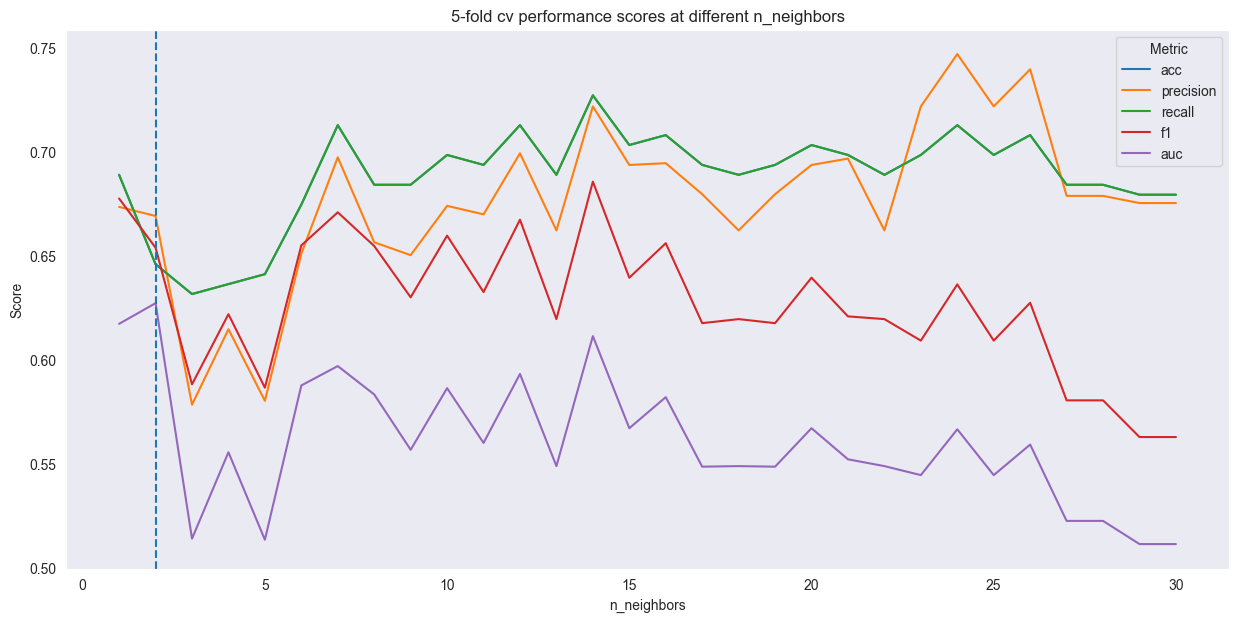

In [180]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data = df_forPlot,
             x = 'n_neighbors',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=2, ls="--")
plt.title('5-fold cv performance scores at different n_neighbors')

\
If we focus on auc, then we select n_neighbors=2

<font color="red">***Using different cv technique can result in different optimal parameter!***</font>

In [181]:
model_knn = knn(n_neighbors=2)
model_knn.fit(X=X_train_sc, y=y_train)

KNeighborsClassifier(n_neighbors=2)

In [182]:
y_pred_test = model_knn.predict(X_test_sc)

In [183]:
acc = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test, average='weighted')
recall = metrics.recall_score(y_test, y_pred_test, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_test, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred_test)

print(f"Test set performance scores:\n"
      f"accuracy: {acc:.2f}\n"
      f"precision: {precision:.2f}\n"
      f"recall: {recall:.2f}\n"
      f"f1: {f1:.2f}\n"
      f"auc: {auc:.2f}\n"
     )

Test set performance scores:
accuracy: 0.68
precision: 0.70
recall: 0.68
f1: 0.69
auc: 0.66



&nbsp;  
<font color="#275bb0">**Tune 'C' (regularization parameter) in SVM model using 5-fold cv**</font>

\
Set range of 'C' to be tested:

In [184]:
cs = [c for c in range(1,101) if c%10==0 or c==1]
cs

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

\
Configure cv:

In [185]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=1234)

\
Perform cv for each 'C':

In [186]:
perf = {}
perf['C'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for c in cs:
    model_svm = svm.SVC(kernel='rbf', C=c)
    y_pred = cross_val_predict(estimator=model_svm,
                               X=X_train_sc,
                               y=y_train,
                               cv=skf)
    acc = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred, average='weighted')
    f1 = metrics.f1_score(y_train, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_train, y_pred)

    perf['C'].append(c)
    perf['acc'].append(acc)
    perf['precision'].append(precision)
    perf['recall'].append(recall)
    perf['f1'].append(f1)
    perf['auc'].append(auc)

perf = pd.DataFrame(perf)
perf.sort_values(by='auc', ascending=False).head()

,C,acc,precision,recall,f1,auc
0,1,0.808612,0.805373,0.808612,0.799757,0.747758
1,10,0.770335,0.768673,0.770335,0.769430,0.734616
3,30,0.751196,0.751196,0.751196,0.751196,0.716625
2,20,0.746411,0.743682,0.746411,0.744886,0.705465
5,50,0.746411,0.742050,0.746411,0.743781,0.701658


\
Plot performance scores for each 'C':

In [187]:
df_forPlot = pd.melt(perf,
                     value_vars = ['acc', 'precision', 'recall', 'f1', 'auc'],
                     id_vars = ['C'],
                     var_name = 'Metric',
                     value_name = 'Score')

Text(0.5, 1.0, '5-fold cv performance scores at different C')

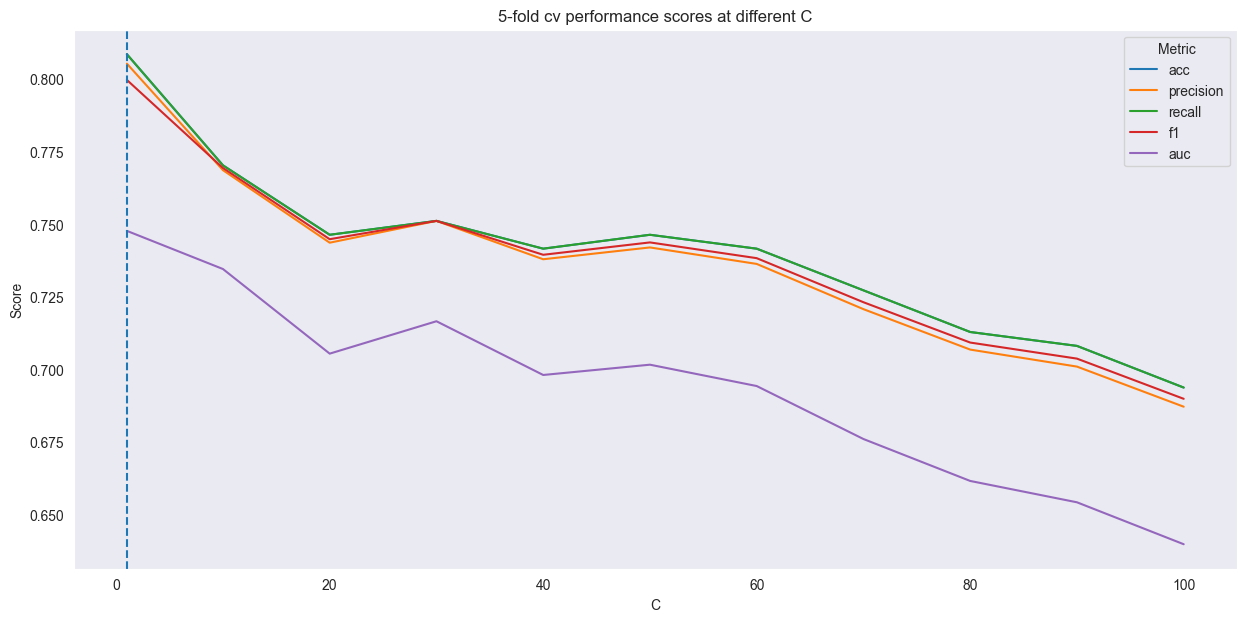

In [188]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(data = df_forPlot,
             x = 'C',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=1, ls="--")
plt.title('5-fold cv performance scores at different C')

\
If we focus on auc, then we select C=1

&nbsp;   
<font color="#275bb0">**Use SVM model with tuned 'C' to predict test set**</font>

\
Create SVM model using C=1 and fit on train data

In [189]:
model_svm = svm.SVC(kernel='rbf', C=1)
model_svm.fit(X=X_train_sc, y=y_train)

SVC(C=1)

\
Use above SVM model (optimized C) to predict test set

In [190]:
y_pred_test = model_svm.predict(X_test_sc)

\
Evaluate model performance scores based on test set

In [191]:
acc = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test, average='weighted')
recall = metrics.recall_score(y_test, y_pred_test, average='weighted')
f1 = metrics.f1_score(y_test, y_pred_test, average='weighted')
auc = metrics.roc_auc_score(y_test, y_pred_test)

print(f"Test set performance scores:\n"
      f"accuracy: {acc:.2f}\n"
      f"precision: {precision:.2f}\n"
      f"recall: {recall:.2f}\n"
      f"f1: {f1:.2f}\n"
      f"auc: {auc:.2f}\n"
     )

Test set performance scores:
accuracy: 0.81
precision: 0.82
recall: 0.81
f1: 0.79
auc: 0.72



&nbsp;   
<font color="#275bb0">**K-fold vs. LOOCV in parameter tuning**</font>

If we perform repeat K-fold cv with 10 different 'random_state' values:

In [192]:
perf = {}
perf['random_state'] = []
perf['n_neighbors'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for r in range(10): # repeat 5-fold cv for 10 times with different random_state
    for k in ks:
        model_knn = knn(n_neighbors=k)

        skf = StratifiedKFold(n_splits=5,
                          shuffle=True,
                          random_state=r) # Using different random_state

        y_pred = cross_val_predict(estimator=model_knn,
                                   X=X_train_sc,
                                   y=y_train,
                                   cv=skf)
        acc = metrics.accuracy_score(y_train, y_pred)
        precision = metrics.precision_score(y_train, y_pred, average='weighted')
        recall = metrics.recall_score(y_train, y_pred, average='weighted')
        f1 = metrics.f1_score(y_train, y_pred, average='weighted')
        auc = metrics.roc_auc_score(y_train, y_pred)

        perf['random_state'].append(r)
        perf['n_neighbors'].append(k)
        perf['acc'].append(acc)
        perf['precision'].append(precision)
        perf['recall'].append(recall)
        perf['f1'].append(f1)
        perf['auc'].append(auc)

perf_5f = pd.DataFrame(perf)
perf_5f.sort_values(by='auc', ascending=False).head()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,random_state,n_neighbors,acc,precision,recall,f1,auc
39,1,10,0.755981,0.753492,0.755981,0.729672,0.659262
219,7,10,0.746411,0.738534,0.746411,0.721535,0.652169
215,7,6,0.722488,0.708621,0.722488,0.709647,0.649666
217,7,8,0.736842,0.724871,0.736842,0.713450,0.645077
41,1,12,0.746411,0.742605,0.746411,0.716472,0.644556


***Above cell perform prediction for 30(number of n_neighbors used 1-30) * 5(5-fold cv) * 10 (repeat 5-fold cv for 10 times) = 1500 times!***

\
If we focus only on 'auc':

[(0.5, 0.9)]

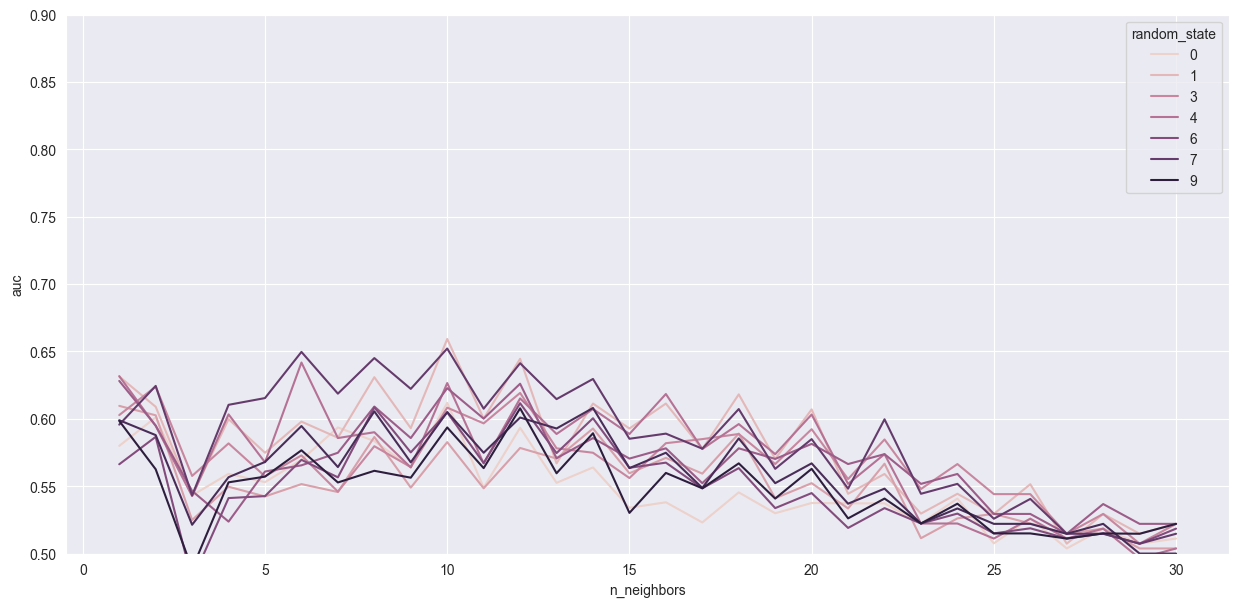

In [193]:
fig, ax = plt.subplots(figsize=(15, 7))
g_5f = sns.lineplot(data=perf_5f, x='n_neighbors', y='auc', hue='random_state', ax=ax)
g_5f.set(ylim=(0.5, 0.9))

[(0.5, 0.9)]

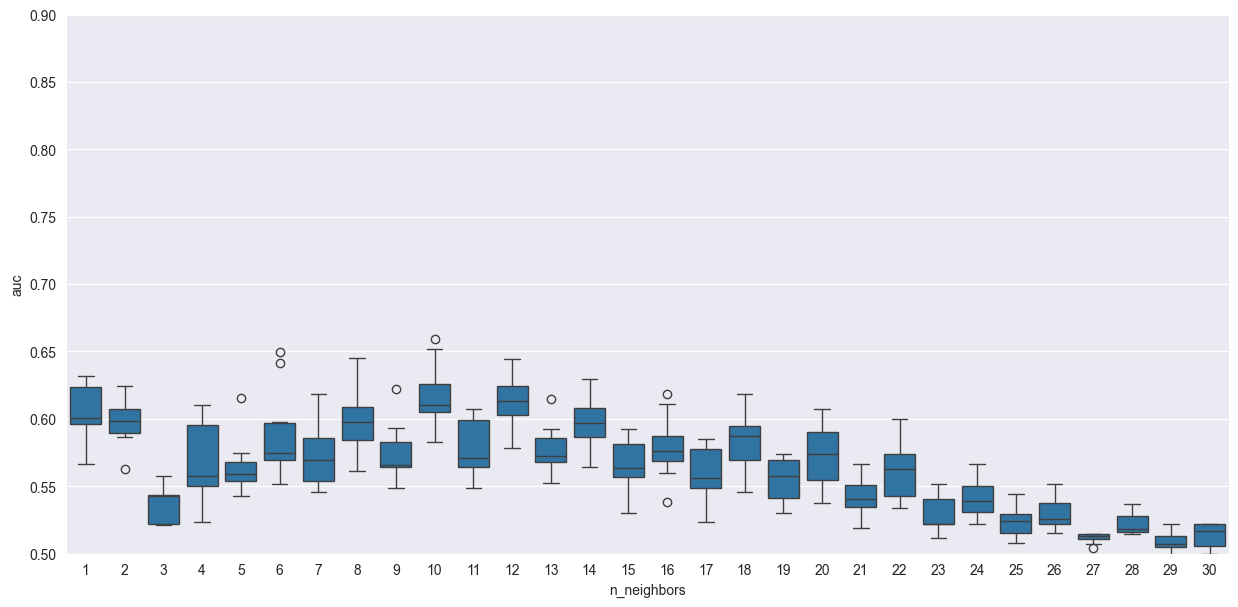

In [194]:
fig, ax = plt.subplots(figsize=(15, 7))
g_5f = sns.boxplot(data=perf_5f, x='n_neighbors', y='auc', ax=ax)
g_5f.set(ylim=(0.5, 0.9))

\
If we perform repeat simple train-test split 10 times:

In [195]:
perf = {}
perf['random_state'] = []
perf['n_neighbors'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for r in range(10):
    for k in ks:
        model_knn = knn(n_neighbors=k)

        rX_train, rX_test, ry_train, ry_test = train_test_split(X_train_sc, y_train, test_size=0.3, random_state=r)

        model_knn.fit(rX_train, ry_train)
        y_pred = model_knn.predict(rX_test)
        acc = metrics.accuracy_score(ry_test, y_pred)
        precision = metrics.precision_score(ry_test, y_pred, average='weighted')
        recall = metrics.recall_score(ry_test, y_pred, average='weighted')
        f1 = metrics.f1_score(ry_test, y_pred, average='weighted')
        auc = metrics.roc_auc_score(ry_test, y_pred)

        perf['random_state'].append(r)
        perf['n_neighbors'].append(k)
        perf['acc'].append(acc)
        perf['precision'].append(precision)
        perf['recall'].append(recall)
        perf['f1'].append(f1)
        perf['auc'].append(auc)

perf_rtt = pd.DataFrame(perf)
perf_rtt.sort_values(by='auc', ascending=False).head()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.

,random_state,n_neighbors,acc,precision,recall,f1,auc
270,9,1,0.793651,0.790464,0.793651,0.791837,0.738889
129,4,10,0.841270,0.836598,0.841270,0.827717,0.728723
273,9,4,0.698413,0.738647,0.698413,0.710243,0.688889
281,9,12,0.793651,0.784715,0.793651,0.776192,0.688889
285,9,16,0.793651,0.784715,0.793651,0.776192,0.688889


***Above cell perform prediction for 30(number of n_neighbors used 1-30) * 10 (repeat train-test split for 10 times) = 300 times!***

[(0.5, 0.9)]

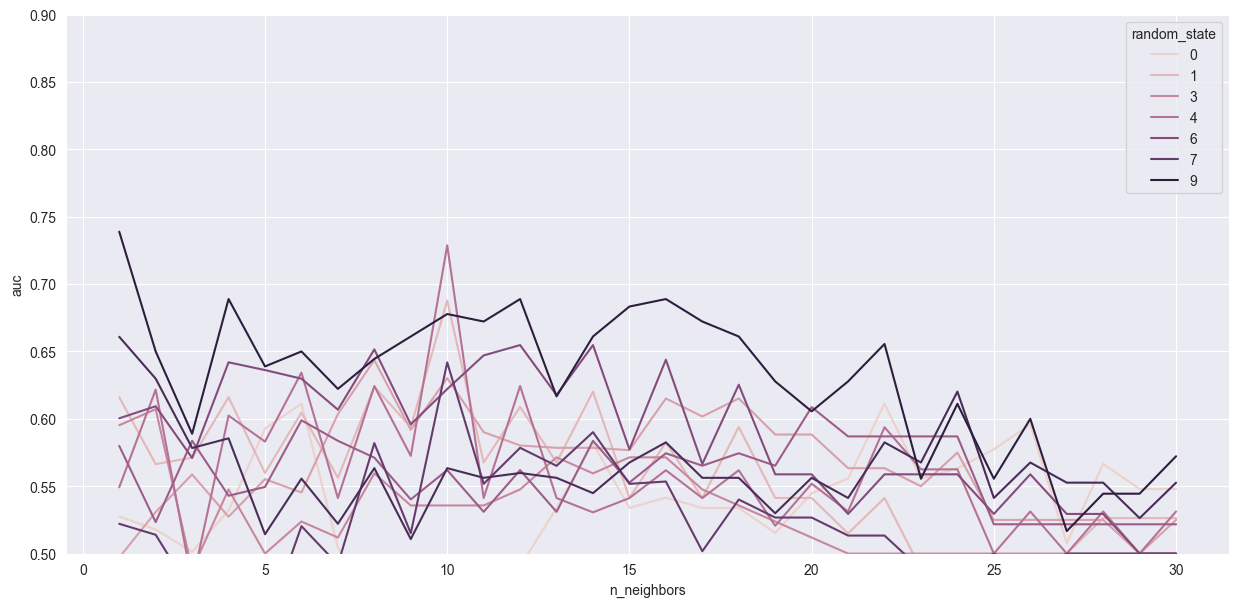

In [196]:
fig, ax = plt.subplots(figsize=(15, 7))
g_rtt = sns.lineplot(data=perf_rtt, x='n_neighbors', y='auc', hue='random_state', ax=ax)
g_rtt.set(ylim=(0.5, 0.9))

[(0.5, 0.9)]

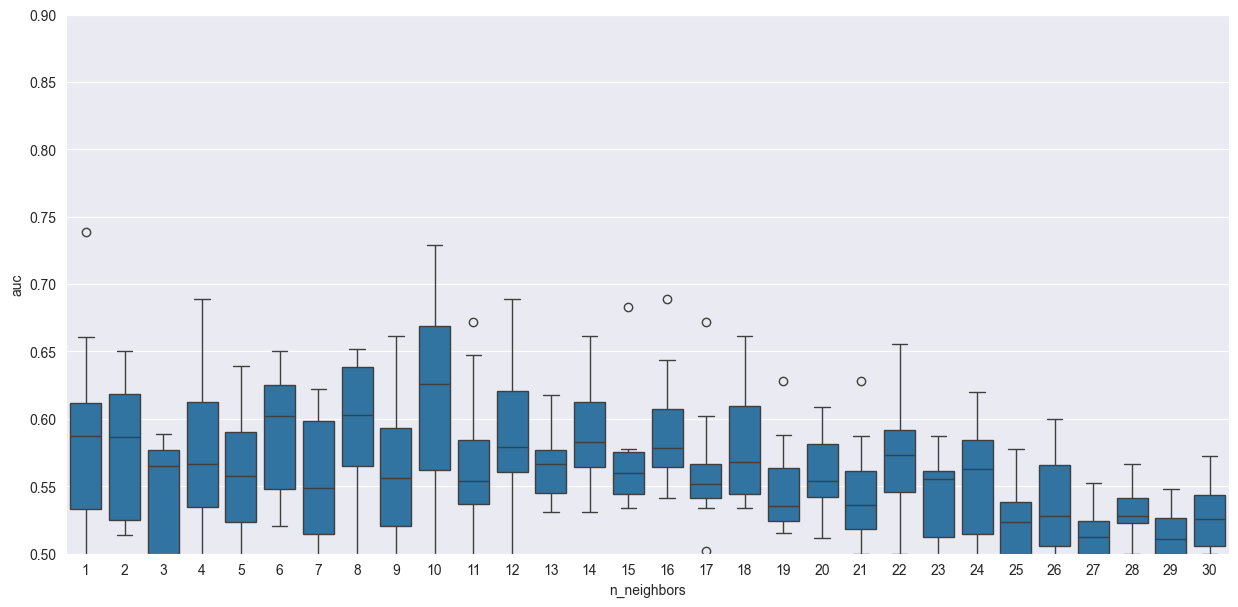

In [197]:
fig, ax = plt.subplots(figsize=(15, 7))
g_rtt = sns.boxplot(data=perf_rtt, x='n_neighbors', y='auc', ax=ax)
g_rtt.set(ylim=(0.5, 0.9))

\
In the case of using LOOCV:   
(there is no need to repeat LOOCV since every repeat you will get the same performance score)

In [198]:
ks = range(1,31)

In [199]:
loo = LeaveOneOut()

In [200]:
perf = {}
perf['n_neighbors'] = []
perf['acc'] = []
perf['precision'] = []
perf['recall'] = []
perf['f1'] = []
perf['auc'] = []

for k in ks:
    model_knn = knn(n_neighbors=k)
    y_pred = cross_val_predict(estimator=model_knn,
                               X=X_train_sc,
                               y=y_train,
                               cv=loo) # use LOOCV
    acc = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred, average='weighted')
    f1 = metrics.f1_score(y_train, y_pred, average='weighted')
    auc = metrics.roc_auc_score(y_train, y_pred)

    perf['n_neighbors'].append(k)
    perf['acc'].append(acc)
    perf['precision'].append(precision)
    perf['recall'].append(recall)
    perf['f1'].append(f1)
    perf['auc'].append(auc)

perf_loo = pd.DataFrame(perf)
perf_loo.sort_values(by='auc', ascending=False).head()

,n_neighbors,acc,precision,recall,f1,auc
1,2,0.645933,0.669184,0.645933,0.653919,0.627190
0,1,0.688995,0.673544,0.688995,0.677572,0.617230
13,14,0.727273,0.721963,0.727273,0.685730,0.611337
6,7,0.712919,0.697435,0.712919,0.670941,0.596892
11,12,0.712919,0.699361,0.712919,0.667391,0.593085


***Above cell perform prediction for 30(number of n_neighbors used 1-30) * 209 (LOOCV) = 6270 times!***

[(0.5, 0.9)]

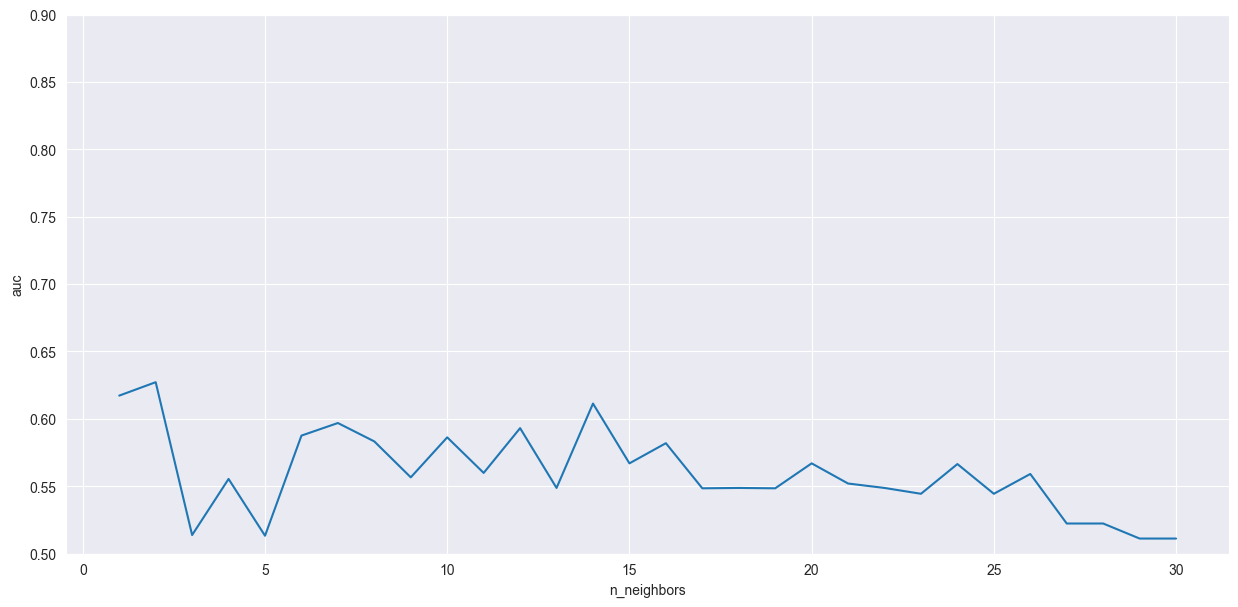

In [201]:
fig, ax = plt.subplots(figsize=(15, 7))
g_loo = sns.lineplot(data=perf_loo, x='n_neighbors', y='auc', ax=ax)
g_loo.set(ylim=(0.5, 0.9))

\
***Compare repeat K-fold vs. repeat train-test split vs. LOOCV***

[(0.5, 0.9), Text(0.5, 1.0, '10 times train-test split')]

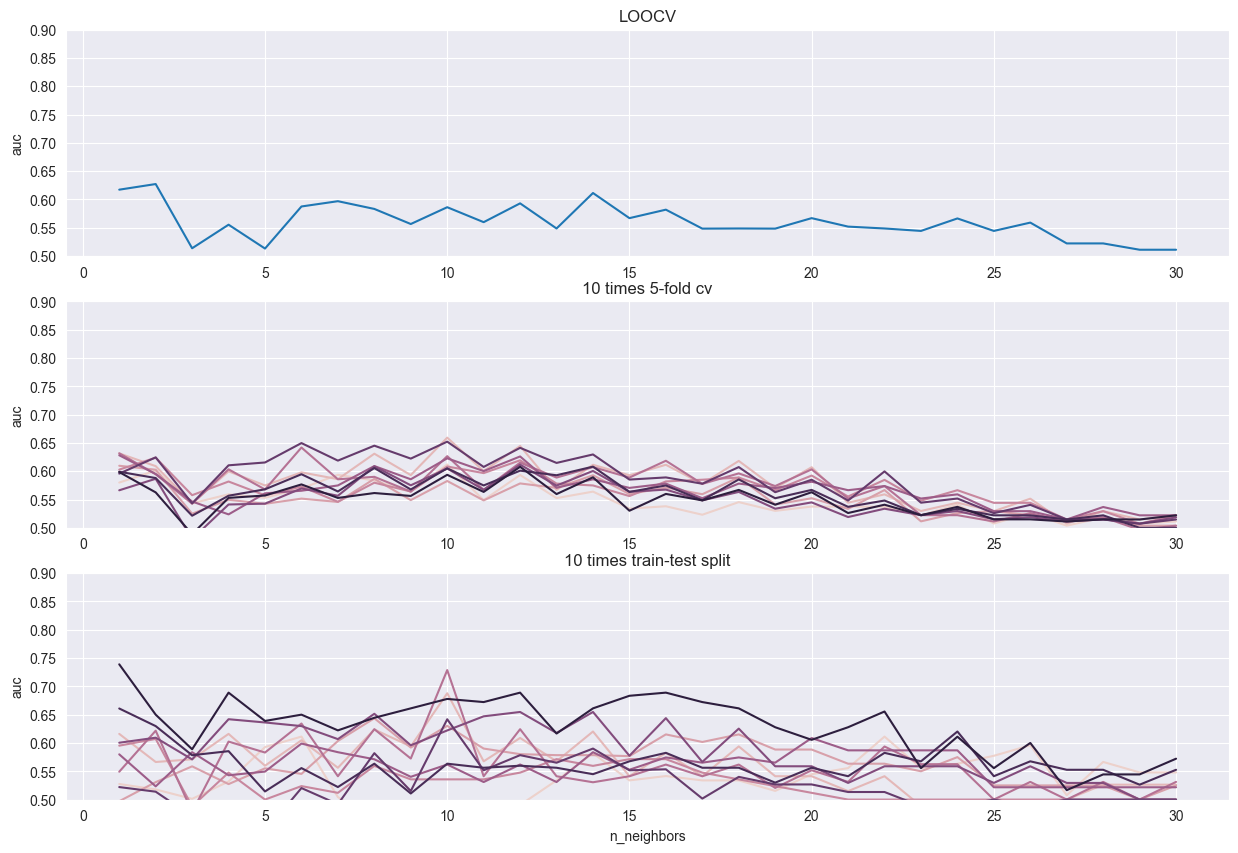

In [202]:
fig, axes = plt.subplots(3, 1, figsize=(15,10))  #3 row, 1 columns
sns.lineplot(data=perf_loo, x='n_neighbors', y='auc', ax=axes[0], legend=False).set(ylim=(0.5, 0.9), title="LOOCV", xlabel=None)
sns.lineplot(data=perf_5f, x='n_neighbors', y='auc', hue='random_state', ax=axes[1], legend=False).set(ylim=(0.5, 0.9), title="10 times 5-fold cv", xlabel=None)
sns.lineplot(data=perf_rtt, x='n_neighbors', y='auc', hue='random_state', ax=axes[2], legend=False).set(ylim=(0.5, 0.9), title="10 times train-test split")

\
Let's check on auc scores at n_neighbors=6 from LOOCV, 10 x 5-fold cv, and 10 x train-test split

\
LOOCV:

In [203]:
nb_6_LOOCV = perf_loo.query('n_neighbors==6')['auc']
nb_6_LOOCV

5    0.587557
Name: auc, dtype: float64

\
10 x 5-fold cv:

In [204]:
nb_6_105f = perf_5f.query('n_neighbors==6')['auc']
nb_6_105f

5      0.569566
35     0.597935
65     0.551575
95     0.572851
125    0.641792
155    0.565499
185    0.569566
215    0.649666
245    0.594650
275    0.576658
Name: auc, dtype: float64

In [205]:
f"auc = {nb_6_105f.mean():.2f} \u00B1 {nb_6_105f.std():.2f}"

'auc = 0.59 ± 0.03'

\
10 x train-test split:

In [206]:
nb_6_10tt = perf_rtt.query('n_neighbors==6')['auc']
nb_6_10tt

5      0.611253
35     0.604665
65     0.545349
95     0.523810
125    0.634309
155    0.598913
185    0.629795
215    0.520349
245    0.555622
275    0.650000
Name: auc, dtype: float64

In [207]:
f"auc = {nb_6_10tt.mean():.2f} \u00B1 {nb_6_10tt.std():.2f}"

'auc = 0.59 ± 0.05'